In [17]:
import pandas as pd

In [18]:
df1= pd.read_csv('/Users/zhanfengzhao/Desktop/Features data set.csv')
df2= pd.read_csv('/Users/zhanfengzhao/Desktop/sales data-set.csv')


In [19]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [21]:
df3=pd.DataFrame(df2.groupby(['Store','Date']).Weekly_Sales.sum())

In [22]:
df3.reset_index(inplace=True)

In [23]:
df3.head()

,Store,Date,Weekly_Sales
0,1,01/04/2011,1495064.75
1,1,01/06/2012,1624477.58
2,1,01/07/2011,1488538.09
3,1,01/10/2010,1453329.50
4,1,02/03/2012,1688420.76


In [24]:
df=pd.merge(df1,df3, on=['Store','Date'], how='left')

In [26]:
df=df[df.Weekly_Sales.notna()]

In [11]:
df=df[df.Weekly_Sales.notna()]

In [37]:
df.drop(["MarkDown1",'MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
df.to_csv ('/Users/zhanfengzhao/Desktop/export_dataframe.csv', index = False, header=True)


In [28]:
dfr=df[df.Store==1][['Date','Weekly_Sales']]

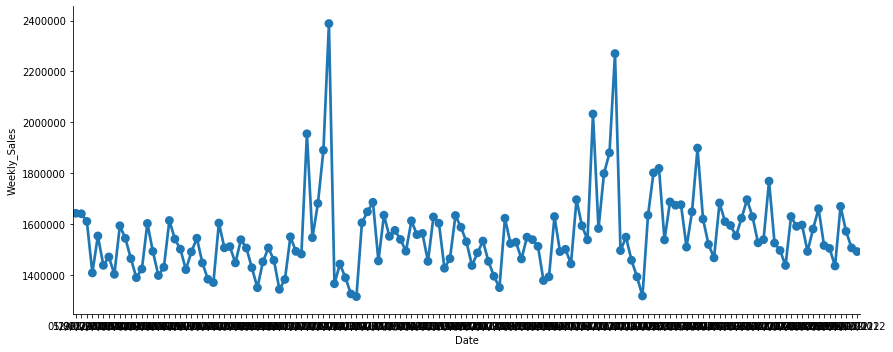

In [29]:
import seaborn as sns
sns.catplot(x='Date',y='Weekly_Sales',data=dfr,kind='point',aspect=2.5)